# Modelos PCA y SOM



# Modelo  PCA

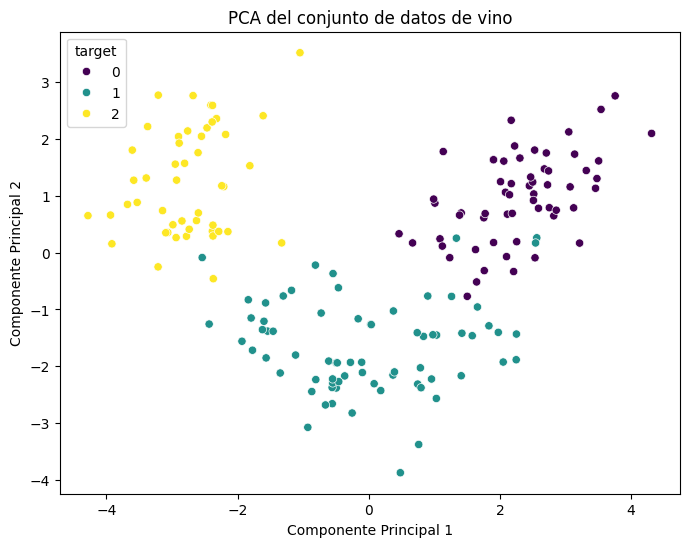

Varianza explicada por cada componente: [0.36198848 0.1920749 ]
Varianza total explicada: 0.5540633835693526


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos de vino
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_wine.drop('target', axis=1))

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['target'] = df_wine['target']

# Visualizar los resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='viridis')
plt.title('PCA del conjunto de datos de vino')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Varianza explicada
print(f"Varianza explicada por cada componente: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_)}")

# Modelo SOM

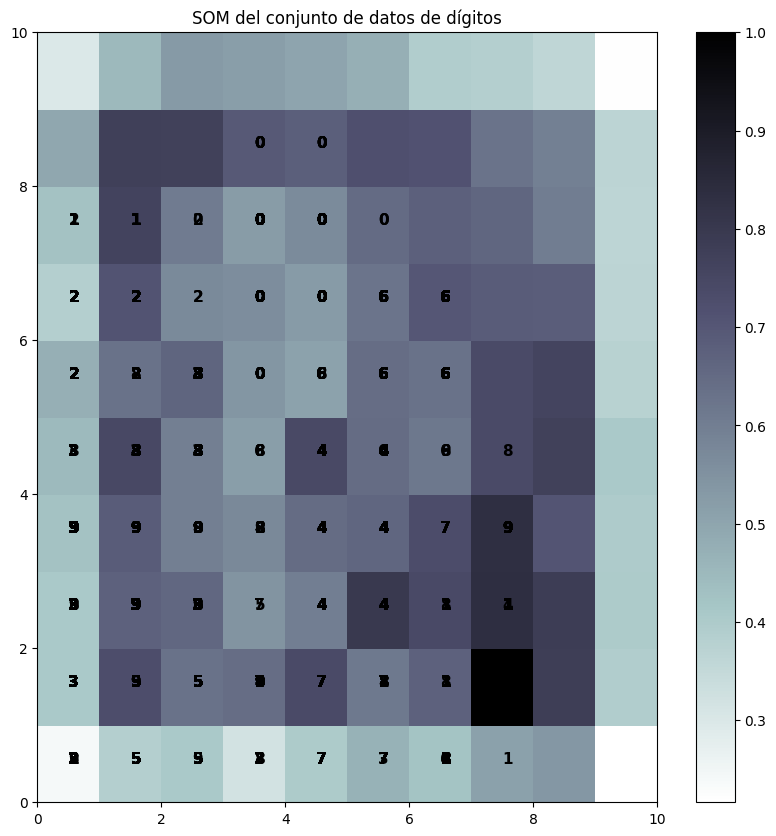

In [2]:
import numpy as np
from sklearn.datasets import load_digits
import minisom
import matplotlib.pyplot as plt

# Cargar el conjunto de datos de dígitos
digits = load_digits()
data = digits.data

# Normalizar los datos
data = data / data.max()

# Crear y entrenar el modelo SOM
som = minisom.MiniSom(x=10, y=10, input_len=64, sigma=1.0, learning_rate=0.5)
som.train_random(data=data, num_iteration=1000)

# Visualizar los resultados
plt.figure(figsize=(10, 10))
for i, x in enumerate(data):
    w = som.winner(x)
    plt.text(w[0]+0.5, w[1]+0.5, str(digits.target[i]), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.title('SOM del conjunto de datos de dígitos')
plt.show()